In [15]:
# to read .pkl files
import pickle

# to create and manipulate dataframe
import pandas as pd

# for Scientific and vector computation
import numpy as np

#to plot (visualize) the data
from matplotlib import pyplot as plt

from scipy import optimize

import random

<p> Reading the file train_image.pkl and train_label.pkl. <br/>
    And storing the result in a dataframe 'data' </p>

In [2]:
with open('train_image.pkl','rb') as f:
    data = pd.DataFrame(pickle.load(f))
with open('train_label.pkl','rb') as fp:
    df = pd.DataFrame(pickle.load(fp))
data = pd.concat([data,df],axis=1)
num = [p for p in range(8000)]
random.shuffle(num)
#print(num)
data_array = np.zeros((8000,785))
X = np.zeros((8000,785))
X = data.iloc[num,:]
#display(data)
data = pd.DataFrame(X)
display(data)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,0
2187,0,0,0,0,0,0,0,0,18,0,...,0,47,33,22,1,0,0,0,0,2
2181,0,0,0,0,0,0,0,0,0,41,...,81,84,0,0,0,0,0,0,0,2
980,0,0,0,0,0,3,0,0,0,44,...,53,44,45,57,39,0,0,0,0,0
630,0,0,0,0,0,0,0,2,0,0,...,16,7,0,2,0,0,0,0,0,0
6424,0,0,0,0,0,0,0,0,0,0,...,0,1,0,37,72,18,9,26,0,6
4173,0,0,0,0,0,0,0,0,0,26,...,166,104,0,0,0,0,0,0,0,3
6061,0,0,0,0,0,0,0,0,0,0,...,32,98,98,0,0,0,0,0,0,6
5903,0,0,0,0,0,0,0,0,0,35,...,0,0,0,0,0,0,0,0,0,3
3701,0,0,0,0,0,0,0,0,0,0,...,0,0,165,175,111,0,0,0,0,2
2953,0,0,0,0,0,1,0,0,5,0,...,0,0,9,2,0,0,0,0,0,2


<p> Since there are 784 columns, so the image will be <strong>28 X 28</strong> grid.<br/> The cell given below tries to visualize the data to gain more understanding of it </p>

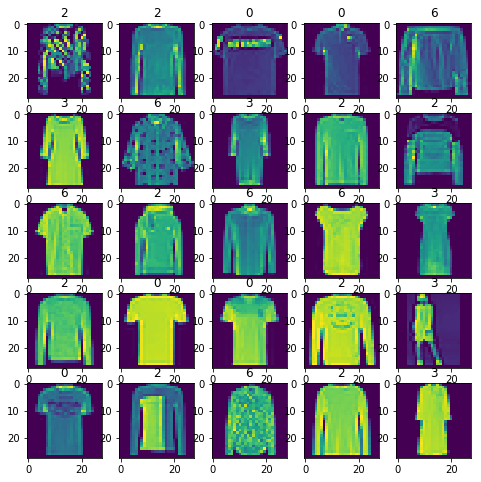

In [3]:
m = 28

# x stores the pixel density of one complete 28 X 28 grid
x = np.zeros((m,m))

# creating 20 subplots of 
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
for a,k in zip(ax.flat,range(25)):
    for i in range(0,756,28):
        j = int(i/28)
        x[j,:] = X.values[k,i:i+28]
    a.imshow(x)
    a.set_title(X.values[k,784])

In [13]:
labels = np.unique(X.values[:,784])
print(labels)

[0 2 3 6]


<p>Creating :
    <ol>
        <li>Training set : X_train,Y_train (60 % of data provided i.e contains 4800 rows)</li>
        <li>Test set : X_test, Y_test (20 % i.e. 1600 rows)</li>
        <li>Validation set : X_val, Y_val (20% i.e. 1600 rows)</li>
    </ol>
    Here X and Y contains the data for images and their label respectively. We're creating different sets so as to select good regularization parameter and check the accuracy/precision of our algorithm.
</p>

In [5]:
X_train = np.zeros((4800,784))
Y_train = np.zeros(4800)
X_train = np.concatenate([np.ones(4800),X.values[:4800,:-1]],axis = 1)
Y_train = X.values[:4800,784]
X_val = X.values[4800:6400,:-1]
Y_val = X.values[4800:6400,784]
X_test = X.values[6400:,:-1]
Y_test = X.values[6400:,784]

In [29]:
def sigmoid(z):
    sig = np.exp(-z)
    sig = 1  + sig
    sig = 1/sig
    return sig

In [30]:
def lrCostFunction(theta,X,Y,lambda_):
    if Y.dtype == bool:
        Y = Y.astype(int)
    m = Y.size
    J = -1/m * np.sum(Y*np.log(sigmoid(np.dot(X,theta))) + (1-Y)*np.log(1-sigmoid(np.dot(X,theta))))
    J = J + lambda_/(2*m) * np.sum(theta[1:]**2)
    grad = np.dot(X.T,sigmoid(np.dot(X,theta))-Y)
    grad[1:] = grad[1:] + (lambda_/m)*theta[1:]
    return J,grad

In [31]:
def calcTheta(X,Y,initial_theta,lambda_,labels):
    options = {'maxiter':50}
    all_theta = np.zeros((len(labels),X.shape[1]))
    for (c,j) in zip(labels,range(len(labels))) :
        res = optimize.minimize(lrCostFunction,initial_theta,(X,(Y==c),lambda_),jac=True,method='TNC',options=options)
        all_theta[j:] = res.x
    return all_theta

In [32]:
n = X_train.shape[1]
m = len(labels)
print(X_train.shape)
initial_theta = np.zeros((n,1))
print(initial_theta.shape)
print(Y_train.shape)
lambda_ = 0.1
Theta = calcTheta(X_train,Y_train,initial_theta,lambda_,labels)


(4800, 784)
(784, 1)
(4800,)


/home/deepti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/deepti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


NameError: name 'all_theta' is not defined